In [55]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [59]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

# Paytype

In [75]:
%%time
query = """
select  pay_type_cd as pay_type , 
count(*) as total_count , 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data 
where is_emailable_ind='Y' 
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1 order by total_count desc; 
"""
df = dbu.get_df_from_query(query)
display(df)

,pay_type,total_count,ct_ilink
0,JJC,4055333,332139
1,VISA,1919545,344492
2,MC,695456,133824
3,AMEX,481109,78772
4,DEBIT,194108,57734
5,DISC,143404,27698
6,GCRD,89762,34575
7,CASH,75047,30530
8,,33800,15456
9,CK,11743,3243


CPU times: user 38.2 ms, sys: 25.2 ms, total: 63.4 ms
Wall time: 10.8 s


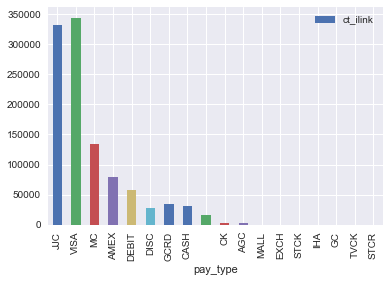

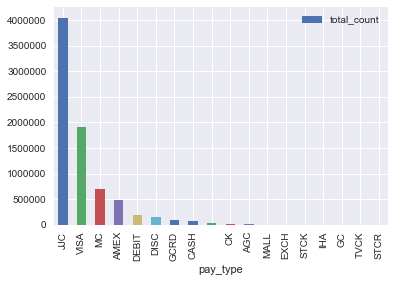

In [77]:
df.plot.bar(x='pay_type',y='ct_ilink');
df.plot.bar(x='pay_type',y='total_count');

### Pay_type analysis

- More distinct users use VISA for payment
- More purchases are made using JJC by almost double
- JJC holders as a result must be purchasing more frequently
- Way to Define repeatable buyers vs. normal users?

Paytype might be away to distinguish between customers who purchase/continue purchasing vs. customers who buy sparingly

# End_Use

In [84]:
%%time
query = """
select  end_use_desc as end_use, 
count(*) as total_count , 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data 
where is_emailable_ind='Y'
and end_use_desc != ''
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1 order by total_count desc; 
"""
df1 = dbu.get_df_from_query(query)
display(df1)


,end_use,total_count,ct_ilink
0,Core,5138073,760665
1,Pure Jill,1335033,418881
2,Wearever,1231733,404928


CPU times: user 22.7 ms, sys: 12.6 ms, total: 35.4 ms
Wall time: 9.56 s


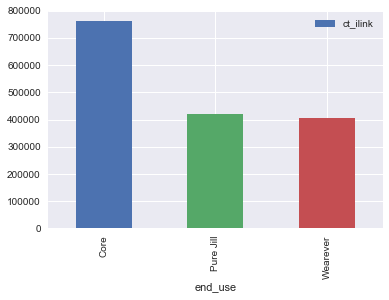

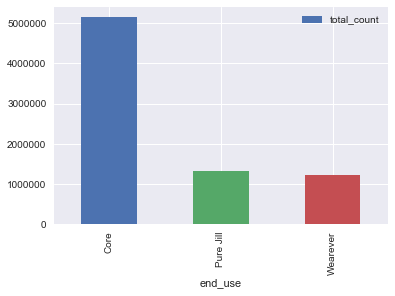

In [89]:
df1.plot.bar(x='end_use',y='ct_ilink');
df1.plot.bar(x='end_use',y='total_count');

### End_Use Analysis
- More distinct users buying core 
- same amount of distinct users in purejill and wearever
- More purchases in Core, almost 5 times as much as others

End_Use will be better suited when comparing with other categorical fts/combination shown later in notebook

# Master Channel

In [87]:
%%time
query = """
select  master_channel as master_channel , 
count(*) as total_count , 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data 
where is_emailable_ind='Y' 
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1 order by total_count desc; 
"""
df2 = dbu.get_df_from_query(query)
display(df2)

,master_channel,total_count,ct_ilink
0,D,3953717,510243
1,R,3751124,556189


CPU times: user 18.1 ms, sys: 8.97 ms, total: 27.1 ms
Wall time: 7.85 s


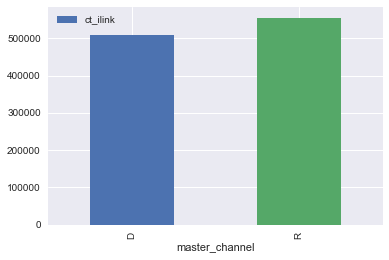

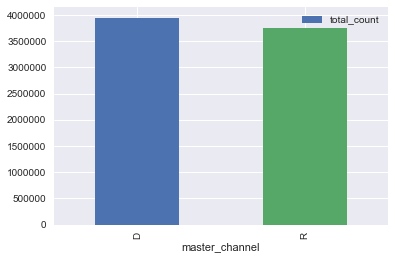

In [88]:
df2.plot.bar(x='master_channel',y='ct_ilink');
df2.plot.bar(x='master_channel',y='total_count');

### Master Channel
- More distinct users purchasing Retail+Instore-orders by small amount
- More purchases being made by small amt catalog+web
- Retail aspect of Jjill's purchase history does very well for an company based around Ecommerce


# Fabric Categories

In [91]:
%%time
query = """
select  fabric_category_desc as fabric , 
count(*) as total_count , 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data 
where is_emailable_ind='Y' 
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1 order by total_count desc;
"""
df3 = dbu.get_df_from_query(query)
display(df3)

,fabric,total_count,ct_ilink
0,Cotton/Cotton Bl,2712244,597204
1,Synthetic/Syn Blend,1553528,475993
2,Linen/Linen Bl,885294,320992
3,Pima,706000,274613
4,Other,610293,296330
5,Rayon/Rayon Bl,550352,273230
6,Ponte,278084,152765
7,Denim,201849,116753
8,Slub,67561,50571
9,Corduroy,51232,33931


CPU times: user 30.6 ms, sys: 39.4 ms, total: 70 ms
Wall time: 9.64 s


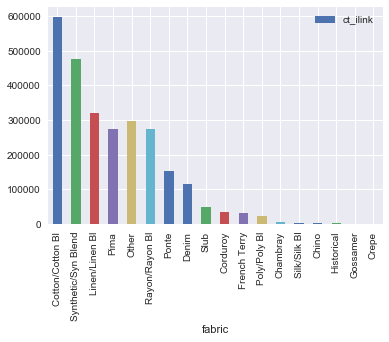

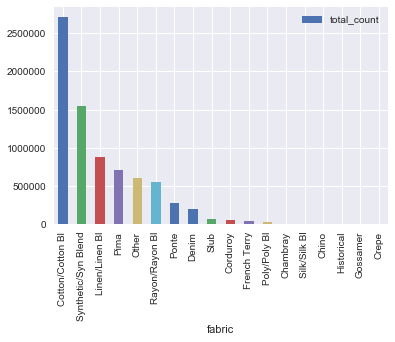

In [93]:
df3.plot.bar(x='fabric',y='ct_ilink');
df3.plot.bar(x='fabric',y='total_count');

### Fabric Category
- Distinct Users purchase more in cotton and synthetics 
- Same amount distinct users purchase in linen,pima,other,rayon
- More than double buy cotton vs synthetics

# Heatmaps

## end_use vs master channel

In [148]:
%%time
query = """
select 
end_use_desc as end_use, 
master_channel as master_channel, 
count(*) as total_count, 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data
where is_emailable_ind='Y' 
and end_use != ''
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1,2 order by total_count desc;
"""
df4 = dbu.get_df_from_query(query)
df4['purchase_per_cust'] = (df4.total_count/df4.ct_ilink).round()
display(df4)

,end_use,master_channel,total_count,ct_ilink,purchase_per_cust
0,Core,D,2670946,461445,6.0
1,Core,R,2467127,491494,5.0
2,Pure Jill,D,667738,228900,3.0
3,Pure Jill,R,667295,258133,3.0
4,Wearever,R,616700,247476,2.0
5,Wearever,D,615033,221214,3.0


CPU times: user 31.5 ms, sys: 6.3 ms, total: 37.8 ms
Wall time: 117 ms


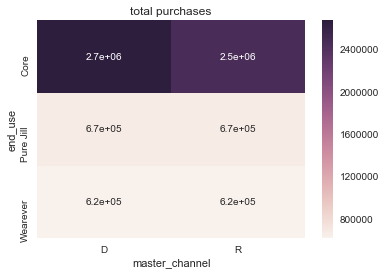

In [121]:
pivt1 = df4.pivot('end_use','master_channel','total_count')
sns.heatmap(pivt1,annot=True).set_title('total purchases');

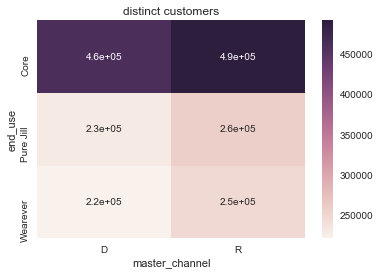

In [122]:
pivt2 = df4.pivot('end_use','master_channel','ct_ilink')
sns.heatmap(pivt2,annot=True).set_title('distinct customers');

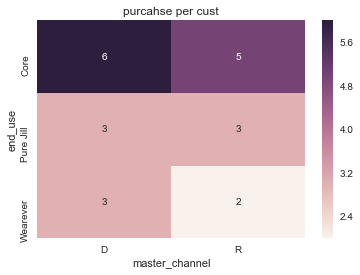

In [219]:
pivt = df4.pivot('end_use','master_channel','purchase_per_cust')
sns.heatmap(pivt,annot=True).set_title('purcahse per cust');

###### End Use vs. Master Channel

- More purchases being made web + catalog for Core
- more distinct customers in retail, instore-order channnel
- Customers purchase more online, but more different customers frequent in-store channels

## end_use vs. pay_type

In [186]:
%%time
query = """
select 
end_use_desc as end_use, 
pay_type_cd as pay_type, 
count(*) as total_count, 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data
where is_emailable_ind='Y' 
and end_use != ''
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1,2 order by total_count desc;
"""
df5 = dbu.get_df_from_query(query)
df5['purchase_per_cust'] = (df5.total_count/df5.ct_ilink).round()
display(df5)

,end_use,pay_type,total_count,ct_ilink,purchase_per_cust
0,Core,JJC,2698221,312885,9.0
1,Core,VISA,1285010,300296,4.0
2,Pure Jill,JJC,726474,199934,4.0
3,Wearever,JJC,630637,186512,3.0
4,Core,MC,466427,115783,4.0
5,Core,AMEX,319255,68885,5.0
6,Pure Jill,VISA,317944,136167,2.0
7,Wearever,VISA,316591,135456,2.0
8,Core,DEBIT,127921,47448,3.0
9,Wearever,MC,114894,51128,2.0


CPU times: user 74.4 ms, sys: 27.6 ms, total: 102 ms
Wall time: 302 ms


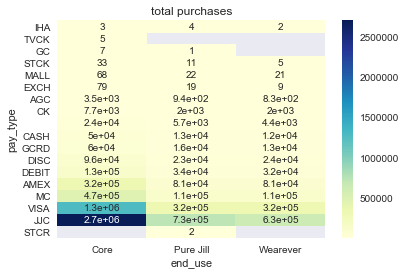

In [216]:
pivt = df5.pivot('pay_type','end_use','total_count')
pivt.sort_values('Core',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('total purchases');

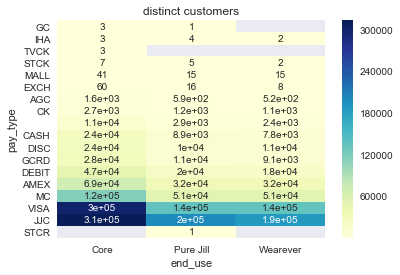

In [217]:
pivt = df5.pivot('pay_type','end_use','ct_ilink')
pivt.sort_values('Core',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('distinct customers');

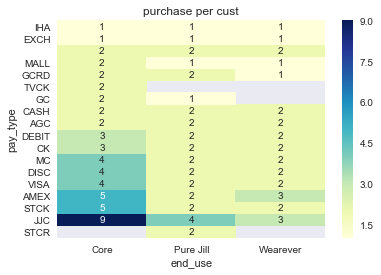

In [220]:
pivt = df5.pivot('pay_type','end_use','purchase_per_cust')
pivt.sort_values('Core',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('purchase per cust');

### Paytype vs. End_Use

- JJC holders tend to purchase more Core vs. any other end_use product
- Visa users primarily purchase in Core, but don't purchase as much on avg compared to amex,stck,jjc

## end use vs. fabric

In [221]:
%%time
query = """
select 
end_use_desc as end_use, 
fabric_category_desc as fabric, 
count(*) as total_count, 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data
where is_emailable_ind='Y' 
and end_use != ''
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1,2 order by total_count desc;
"""
df = dbu.get_df_from_query(query)
df['purchase_per_cust'] = (df.total_count/df.ct_ilink).round()
display(df)

,end_use,fabric,total_count,ct_ilink,purchase_per_cust
0,Core,Cotton/Cotton Bl,1725420,502691,3.0
1,Wearever,Synthetic/Syn Blend,1214947,401542,3.0
2,Pure Jill,Cotton/Cotton Bl,986824,345126,3.0
3,Core,Linen/Linen Bl,737610,290828,3.0
4,Core,Pima,705997,274612,3.0
5,Core,Rayon/Rayon Bl,546669,271785,2.0
6,Core,Other,464234,243504,2.0
7,Core,Synthetic/Syn Blend,289829,183293,2.0
8,Core,Ponte,278084,152765,2.0
9,Core,Denim,201847,116753,2.0


CPU times: user 63.1 ms, sys: 48.9 ms, total: 112 ms
Wall time: 311 ms


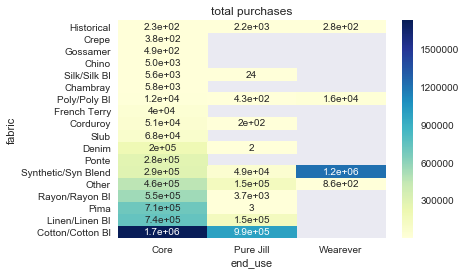

In [222]:
pivt = df.pivot('fabric','end_use','total_count')
pivt.sort_values('Core',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('total purchases');

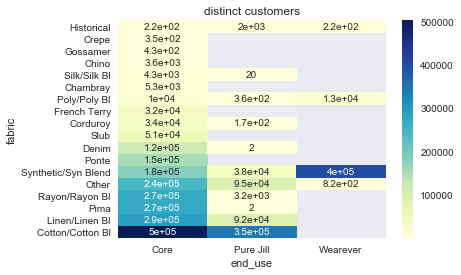

In [223]:
pivt = df.pivot('fabric','end_use','ct_ilink')
pivt.sort_values('Core',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('distinct customers');

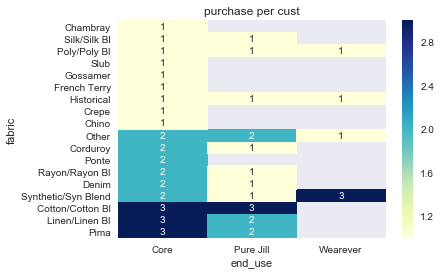

In [224]:
pivt = df.pivot('fabric','end_use','purchase_per_cust')
pivt.sort_values('Core',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('purchase per cust');

### Fabric Category vs. End_use
- More Cotton is purchase overall
- Synthetics mostly purchased from Wearever. Most likely means Wearever is primarily synthetics
- Linens,Pima,Cotton get on avg most purchases per cust

## Paytype vs. Master Channel

In [225]:
%%time
query = """
select 
pay_type_cd as pay_type, 
master_channel as master_channel,
count(*) as total_count, 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data
where is_emailable_ind='Y' 
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1,2 order by total_count desc;
"""
df6 = dbu.get_df_from_query(query)
df6['purchase_per_cust'] = (df6.total_count/df6.ct_ilink).round()
display(df6)

,pay_type,master_channel,total_count,ct_ilink,purchase_per_cust
0,JJC,R,2247959,263803,9.0
1,JJC,D,1807374,185352,10.0
2,VISA,D,1238743,219051,6.0
3,VISA,R,680802,178997,4.0
4,MC,D,461631,85802,5.0
5,AMEX,D,309344,49003,6.0
6,MC,R,233825,65310,4.0
7,DEBIT,R,194108,57734,3.0
8,AMEX,R,171765,42029,4.0
9,DISC,D,99789,18533,5.0


CPU times: user 49.3 ms, sys: 3.34 ms, total: 52.6 ms
Wall time: 112 ms


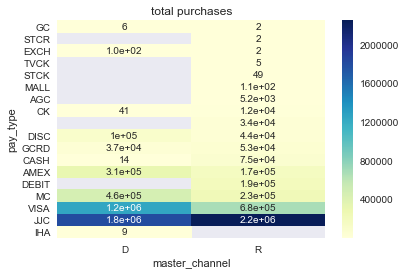

In [231]:
pivt = df6.pivot('pay_type','master_channel','total_count')
pivt.sort_values('R',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('total purchases');

### Total Purchases 
- significant rise from using VISA for catalog+web 
- vs. retail+instore Order by double for total purchases
- Purchases occure more in retail,instore-order channel
- certain paytypes rarely appear in web+catalog channel


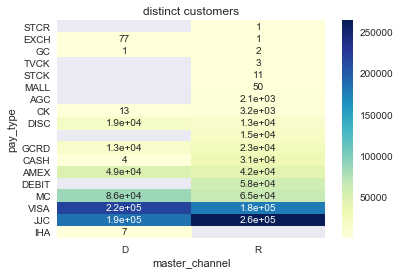

In [232]:
pivt = df6.pivot('pay_type','master_channel','ct_ilink')
pivt.sort_values('R',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('distinct customers');

### Distinct Customers
- R channel gets more distinct customers using JJC
- D Channel gets more distinct customers using Visa

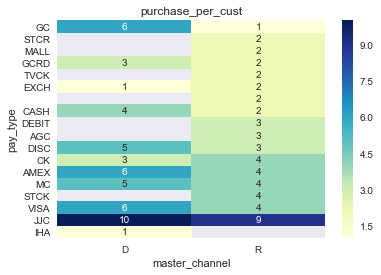

In [233]:
pivt = df6.pivot('pay_type','master_channel','purchase_per_cust')
pivt.sort_values('R',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('purchase_per_cust');

### Purchase per cust
- Avg JJC holder purchases more thru D channel, but not by much
- D channel tends to have more purchases per cust for a pay-type

## Fabric vs. pay_type

In [234]:
%%time
query = """
select 
pay_type_cd as pay_type,
fabric_category_desc as fabric,
count(*) as total_count, 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data
where is_emailable_ind='Y' 
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1,2 order by total_count desc;
"""
df = dbu.get_df_from_query(query)
df['purchase_per_cust'] = (df.total_count/df.ct_ilink).round()
display(df)

,pay_type,fabric,total_count,ct_ilink,purchase_per_cust
0,JJC,Cotton/Cotton Bl,1471074,267190,6.0
1,JJC,Synthetic/Syn Blend,804524,217331,4.0
2,VISA,Cotton/Cotton Bl,647820,213957,3.0
3,JJC,Linen/Linen Bl,447021,149872,3.0
4,VISA,Synthetic/Syn Blend,394557,162765,2.0
5,JJC,Pima,371564,134373,3.0
6,JJC,Other,305713,138752,2.0
7,JJC,Rayon/Rayon Bl,297091,136187,2.0
8,MC,Cotton/Cotton Bl,233991,81043,3.0
9,VISA,Linen/Linen Bl,228743,101302,2.0


CPU times: user 196 ms, sys: 9.66 ms, total: 206 ms
Wall time: 308 ms


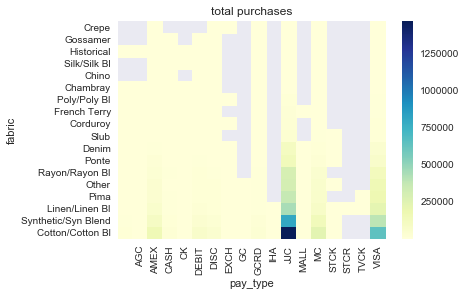

In [235]:
pivt = df.pivot('fabric','pay_type','total_count')
pivt.sort_values('JJC',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu").set_title('total purchases');

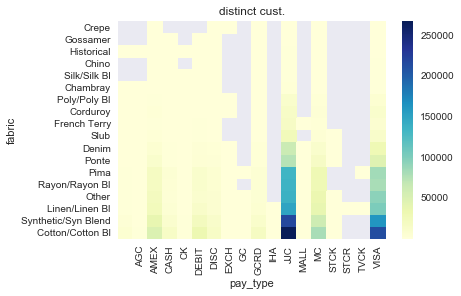

In [236]:
pivt = df.pivot('fabric','pay_type','ct_ilink')
pivt.sort_values('JJC',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu").set_title('distinct cust.');

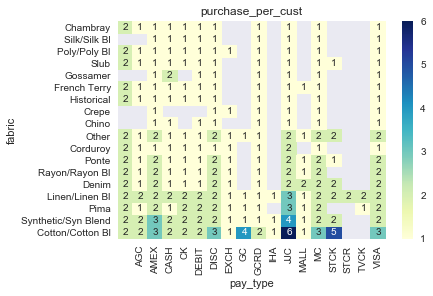

In [238]:
pivt = df.pivot('fabric','pay_type','purchase_per_cust')
pivt.sort_values('JJC',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('purchase_per_cust');

### Fabric Category vs. Pay_type
- Visa and JJC holders purcahse across all fabrics
- JJC holders purchase more and have most distinct cust number purchasing the specific categories

## fabric vs. master channel

In [239]:
%%time
query = """
select 
master_channel as master_channel,
fabric_category_desc as fabric,
count(*) as total_count, 
count(distinct ilink) as ct_ilink
from jjill.jjill_keyed_data
where is_emailable_ind='Y' 
and department_name in ('Woven Shirts','Knit Tops','Pants','Dresses') 
and order_date between '2017-01-01' and '2017-12-31'
group by 1,2 order by total_count desc;
"""
df7 = dbu.get_df_from_query(query)
df7['purchase_per_cust'] = (df7.total_count/df7.ct_ilink).round()
display(df7)

,master_channel,fabric,total_count,ct_ilink,purchase_per_cust
0,R,Cotton/Cotton Bl,1372661,380959,4.0
1,D,Cotton/Cotton Bl,1339583,341786,4.0
2,R,Synthetic/Syn Blend,778055,293479,3.0
3,D,Synthetic/Syn Blend,775473,264984,3.0
4,D,Linen/Linen Bl,472076,182012,3.0
5,R,Linen/Linen Bl,413218,179837,2.0
6,D,Pima,372907,145804,3.0
7,D,Other,365336,183901,2.0
8,R,Pima,333093,160390,2.0
9,R,Rayon/Rayon Bl,307802,168134,2.0


CPU times: user 59.5 ms, sys: 3.54 ms, total: 63 ms
Wall time: 120 ms


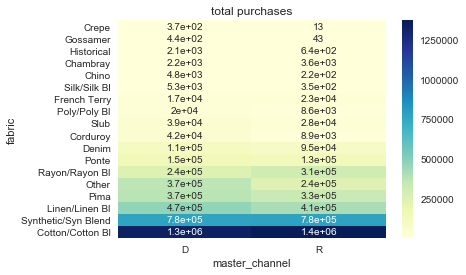

In [240]:
pivt = df7.pivot('fabric','master_channel','total_count')
pivt.sort_values('D',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('total purchases');

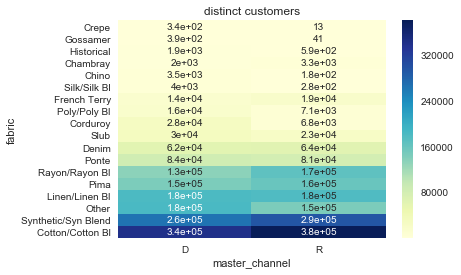

In [241]:
pivt = df7.pivot('fabric','master_channel','ct_ilink')
pivt.sort_values('D',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('distinct customers');

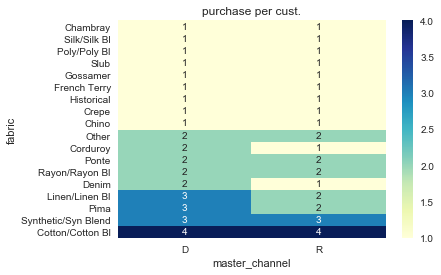

In [242]:
pivt = df7.pivot('fabric','master_channel','purchase_per_cust')
pivt.sort_values('D',inplace=True)
sns.heatmap(pivt,cmap="YlGnBu",annot=True).set_title('purchase per cust.');

### Fabric Category vs. Master Channel
- There appears to be a even comparison between category and channel for purchases,distinct cust., and purchase per cust.
- There doesn't appear to really anything that separates category and channel for customers. 
- Regardless of channel, cust. will still purchase evenly based on category